<a href="https://colab.research.google.com/github/nathanhill923/DATA301-Lab-1A/blob/main/Copy_of_DATA_301_Lab_1B_Nathan_Hill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

In [2]:
import pandas as pd

In [3]:
url = "https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit#gid=970845822"
first_survey_url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df_first_survey = pd.read_csv(first_survey_url)
df_first_survey.head()

,What is your major?,Where are you living this quarter?,How many siblings do you have?,What is your favorite color?,"What is a cool TV show, movie, or book that you liked in 2020?",Suppose you wanted to fill an average-sized school bus entirely with golf balls. How many golf balls do you think you would need?,Do you consider yourself a sports fan?,Do you enjoy video games?,Do you consider yourself artistic?
0,Other,"Off Campus, but in SLO",2,Light Blue,Criminal Minds,500000.0,No,Yes,Yes
1,Statistics,"Off Campus, outside of SLO",5,green,A Gentleman in Moscow,930000.0,No,No,No
2,Computer Science,"Off Campus, but in SLO",2,blue,Crescent City by Sarah J Maas,10000000.0,Yes,No,Yes
3,Other,"Off Campus, outside of SLO",2,Green,The Institute by Stephen King,400000.0,No,No,Yes
4,Computer Science,"Off Campus, outside of SLO",1,Blue/Indigo,Peaky Blinders,100000.0,Yes,Yes,No


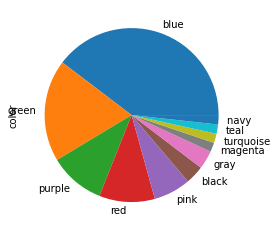

In [35]:
def normal_colors(c):
  if "blue" in c:
    return "blue"
  if "green" in c:
    return "green"
  if "pink" in c:
    return "pink"
  if c in ["grey", "gray"]:
    return "gray"
  else:
    return c

df_first_survey["color"] = df_first_survey["What is your favorite color?"].str.lower()
color_lc = df_first_survey["color"].map(normal_colors)
color_counts = color_lc.value_counts()
color_counts.plot.pie()


**Blue is the most popular color by far, with green, purple, and red also holding sizable proportions. There are also quite a few other colors that are less popular, but still distinct from the others.**




## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

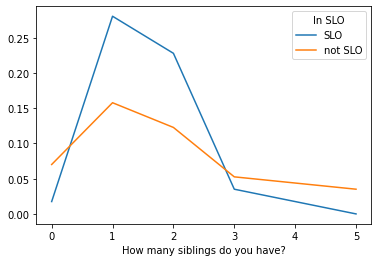

In [47]:
df_first_survey["In SLO"] = df_first_survey["Where are you living this quarter?"].map({
    "Off Campus, but in SLO": "SLO",
    "On-Campus housing": "SLO",
    "Off Campus, outside of SLO": "not SLO"
})
joint_siblings_slo = pd.crosstab(df_first_survey["How many siblings do you have?"], df_first_survey["In SLO"], 
                                    normalize=True)
joint_siblings_slo.plot()

**It actually seems that there are a higher proportion of individuals with 3-5 siblings that live outside of SLO, and a higher proportion of individuals with just 1 or 2 siblings that live in SLO.**



## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

Is there a relationship between the golf ball predictions made by people of different majors?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


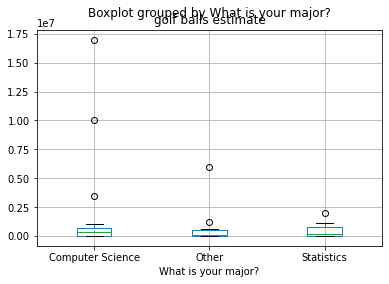

In [37]:
df_first_survey["golf balls estimate"] = df_first_survey["Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"]
boxplot = df_first_survey.boxplot(column = ["golf balls estimate"],  by = 'What is your major?')
boxplot



**There does seem to be some evidence that computer science majors tended to choose higher estimates for golf balls than the others, however each group of majors tended to have similar amounts of variability within them.**

## Question 4

Write and answer your own question using this data set.

Do sports fans consider themselves less artistic than non-sports fans?

(Do you consider yourself artistic?            No       Yes
 Do you consider yourself a sports fan?                    
 No                                      0.293103  0.241379
 Yes                                     0.310345  0.155172,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4010d9610>)

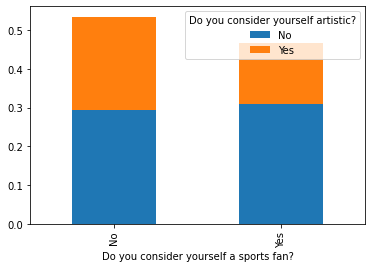

In [99]:

joint_sports_art = pd.crosstab(df_first_survey["Do you consider yourself a sports fan?"], df_first_survey["Do you consider yourself artistic?"], 
                                    normalize=True)
joint_sports_art, joint_sports_art.plot.bar(stacked = True)

**It appears that of the individuals who considered themselves sports fans, there is a smaller group of people who also consider themselves to be artistic compared to the group of non-sports fans, where artistic people make up nearly half the group.**